Randa Hesham

---

# Credit Card Approval Prediction

<u>**Business Challenge:**</u>

Credit score cards are a common risk control method in the financial industry. It uses personal information and data submitted by credit card applicants to predict the probability of future defaults and credit card borrowings. The bank is able to decide whether to issue a credit card to the applicant. Credit scores can objectively quantify the magnitude of risk.

<u>**Problem Statement**:</u> 

Build a machine learning model to predict if an applicant is 'good' or 'bad' client, you should use some techique, such as vintage analysis to construct you label.

## Import Python Libraries

In [ ]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score

## Set Up the Environment

In [ ]:
pd.options.display.float_format = '{:,.2f}'.format
pd.set_option('display.width', 85)
pd.set_option('display.max_columns', 10)

## Load Datasets

Dataset: [kaggle](https://www.kaggle.com/rikdifos/credit-card-approval-prediction)

In [ ]:
app = pd.read_csv('application_record.csv', low_memory=False) # low_memory reduces memory usage during the import process
credit = pd.read_csv('credit_record.csv', low_memory=False) # low_memory reduces memory usage during the import process

## Explanatory Data Analysis (EDA)

### Quick Glimpse of the Data

In [ ]:
app

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,"427,500.00",Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.00
1,5008805,M,Y,Y,0,"427,500.00",Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.00
2,5008806,M,Y,Y,0,"112,500.00",Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.00
3,5008808,F,N,Y,0,"270,000.00",Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.00
4,5008809,F,N,Y,0,"270,000.00",Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
438552,6840104,M,N,Y,0,"135,000.00",Pensioner,Secondary / secondary special,Separated,House / apartment,-22717,365243,1,0,0,0,NaN,1.00
438553,6840222,F,N,N,0,"103,500.00",Working,Secondary / secondary special,Single / not married,House / apartment,-15939,-3007,1,0,0,0,Laborers,1.00
438554,6841878,F,N,N,0,"54,000.00",Commercial associate,Higher education,Single / not married,With parents,-8169,-372,1,1,0,0,Sales staff,1.00
438555,6842765,F,N,Y,0,"72,000.00",Pensioner,Secondary / secondary special,Married,House / apartment,-21673,365243,1,0,0,0,NaN,2.00


In [ ]:
credit

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,C
...,...,...,...
1048570,5150487,-25,C
1048571,5150487,-26,C
1048572,5150487,-27,C
1048573,5150487,-28,C


In [ ]:
app.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438557 entries, 0 to 438556
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   438557 non-null  int64  
 1   CODE_GENDER          438557 non-null  object 
 2   FLAG_OWN_CAR         438557 non-null  object 
 3   FLAG_OWN_REALTY      438557 non-null  object 
 4   CNT_CHILDREN         438557 non-null  int64  
 5   AMT_INCOME_TOTAL     438557 non-null  float64
 6   NAME_INCOME_TYPE     438557 non-null  object 
 7   NAME_EDUCATION_TYPE  438557 non-null  object 
 8   NAME_FAMILY_STATUS   438557 non-null  object 
 9   NAME_HOUSING_TYPE    438557 non-null  object 
 10  DAYS_BIRTH           438557 non-null  int64  
 11  DAYS_EMPLOYED        438557 non-null  int64  
 12  FLAG_MOBIL           438557 non-null  int64  
 13  FLAG_WORK_PHONE      438557 non-null  int64  
 14  FLAG_PHONE           438557 non-null  int64  
 15  FLAG_EMAIL       

Application record file has nine categorical variables and nine numerical variables.

In [ ]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 3 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   ID              1048575 non-null  int64 
 1   MONTHS_BALANCE  1048575 non-null  int64 
 2   STATUS          1048575 non-null  object
dtypes: int64(2), object(1)
memory usage: 24.0+ MB


Credit card records has one categorical column and two numerical columns.

In [ ]:
app['ID'].nunique() # how many unique IDs in application records?

438510

Since the total rows are 438,557 and the unique rows are 438510, this means it has duplicates.

In [ ]:
credit['ID'].nunique() # how many unique IDs in credit records?

45985

This has around 45,000 unique rows as there are repeating entries for different monthly values and status.

> **Note:** There is a big difference between the two unique numbers of the two tables. It's obvious that there are less customers than applications.

In [ ]:
print("Number of shared IDs for the two tables: {}".format(len(set(credit['ID']).intersection(set(app['ID']))))) # checking for how many records match in two datasets

Number of shared IDs for the two tables: 36457


In [ ]:
# Cardinality of features
app.nunique()

ID                     438510
CODE_GENDER                 2
FLAG_OWN_CAR                2
FLAG_OWN_REALTY             2
CNT_CHILDREN               12
AMT_INCOME_TOTAL          866
NAME_INCOME_TYPE            5
NAME_EDUCATION_TYPE         5
NAME_FAMILY_STATUS          5
NAME_HOUSING_TYPE           6
DAYS_BIRTH              16379
DAYS_EMPLOYED            9406
FLAG_MOBIL                  1
FLAG_WORK_PHONE             2
FLAG_PHONE                  2
FLAG_EMAIL                  2
OCCUPATION_TYPE            18
CNT_FAM_MEMBERS            13
dtype: int64

There is 1 constant feature, 6 binary features, 5 continuous features and 5 non-binary categorical features.

### Handling Missing Data

In [ ]:
# Checking null values in application record
app.isnull().sum()

ID                          0
CODE_GENDER                 0
FLAG_OWN_CAR                0
FLAG_OWN_REALTY             0
CNT_CHILDREN                0
AMT_INCOME_TOTAL            0
NAME_INCOME_TYPE            0
NAME_EDUCATION_TYPE         0
NAME_FAMILY_STATUS          0
NAME_HOUSING_TYPE           0
DAYS_BIRTH                  0
DAYS_EMPLOYED               0
FLAG_MOBIL                  0
FLAG_WORK_PHONE             0
FLAG_PHONE                  0
FLAG_EMAIL                  0
OCCUPATION_TYPE        134203
CNT_FAM_MEMBERS             0
dtype: int64

In [ ]:
# Checking null values in credit record
credit.isnull().sum()

ID                0
MONTHS_BALANCE    0
STATUS            0
dtype: int64

“Occupation Type” is the only variable that has null values (NaN), so I'm gonna fill those values with “Others”.

In [ ]:
# filling in missing data
app.OCCUPATION_TYPE = app.OCCUPATION_TYPE.fillna("Others")

### Remove Duplicates and Unnecessary Data

In [ ]:
# Drop duplicates in application record
app = app.drop_duplicates(subset=app.columns[1:], keep='first')

we deleted the duplicates in application record and will keep the last entry of the ID if its repeated.

In [ ]:
# Drop constant feature
app.drop('FLAG_MOBIL', axis=1, inplace=True)

In [ ]:
app.shape

(90085, 17)

### Renaming Features


In [ ]:
app.rename(columns={'CODE_GENDER':'gender', 'FLAG_OWN_CAR':'own_car', 'FLAG_OWN_REALTY':'own_realty',
                    'CNT_CHILDREN':'children_num','AMT_INCOME_TOTAL':'income',
                    'NAME_INCOME_TYPE':'income_type', 'NAME_EDUCATION_TYPE':'education_type',
                    'NAME_FAMILY_STATUS':'family_status', 'NAME_HOUSING_TYPE':'housing_type', 
                    'DAYS_BIRTH':'birth_days', 'DAYS_EMPLOYED':'emplyment_days',
                    'FLAG_WORK_PHONE':'own_work_phone', 'FLAG_PHONE':'own_phone',
                    'FLAG_EMAIL':'own_email', 'OCCUPATION_TYPE':'occupation',
                    'CNT_FAM_MEMBERS':'family_size'
                    },inplace=True)

In [ ]:
# checking new columns names
app.columns

Index(['ID', 'gender', 'own_car', 'own_realty', 'children_num', 'income',
       'income_type', 'education_type', 'family_status', 'housing_type',
       'birth_days', 'emplyment_days', 'own_work_phone', 'own_phone', 'own_email',
       'occupation', 'family_size'],
      dtype='object')

### Data visualization

##### Check Frequencies for some Categorical Variables

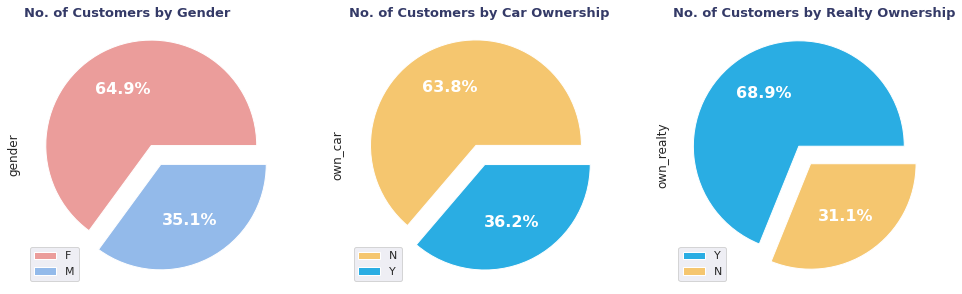

In [ ]:
# Helper function to plot pie chart for the categorical data
def pie_plot(cat_columns, data, titles, colors):
    fig, ax = plt.subplots(1, len(cat_columns))
    fig.set_size_inches(14, 5)
    for i in range(len(cat_columns)):
        g = data[cat_columns[i]].value_counts().plot.pie(explode=[0.1, 0.1],
                                                          colors = colors[i],
                                                          autopct='%1.1f%%',
                                                          textprops = {'fontsize':16, 'color':'white', 'fontweight':'bold'},
                                                          ax=ax[i])
        g.set_title(titles[i], fontsize=13, color= '#343a67', fontweight='bold', loc='left')
        g.legend()
    plt.tight_layout()
    fig.show()

# title of the plots
titles = ["No. of Customers by Gender",
          "No. of Customers by Car Ownership", 
          "No. of Customers by Realty Ownership"]
# Categorical features choosen
cat_columns = ['gender', 'own_car', 'own_realty']

# colors
colors = [["#eb9d9b", "#93baea"],['#f5c66f','#2aade3'],['#2aade3','#f5c66f']]

# Plot the pie chart for the choosen categorical cols
pie_plot(cat_columns, app, titles, colors)

According to the previous graph:
* Gender of the customers are 64% female and 35%
are male.

* 36% of customers own a car.
* 68% of customers own a realty.

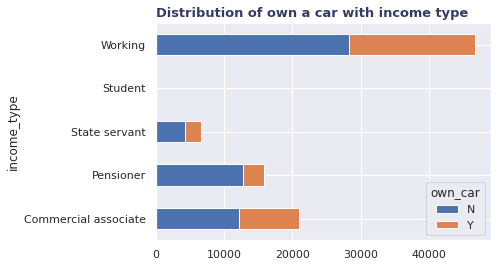

In [ ]:
sns.set(style="darkgrid")

car_income_agg = app.groupby(['own_car', 'income_type']).size().reset_index().pivot(columns='own_car', index='income_type', values=0)
car_income_agg.plot(kind='barh', stacked=True)
plt.title("Distribution of own a car with income type", fontsize=13, color= '#343a67', fontweight='bold', loc='left')
plt.show()

Distribution of own a car with income type:
* about 50% are working
customers and about 30% out of them does not own a car and 20% own a car. 
* about 20% are commercial associates and about 13% out of them does not own a car and 10% own a car. 
* about 15 % are pensioner and about 13 % out of them does not own a car and 4% own a car.

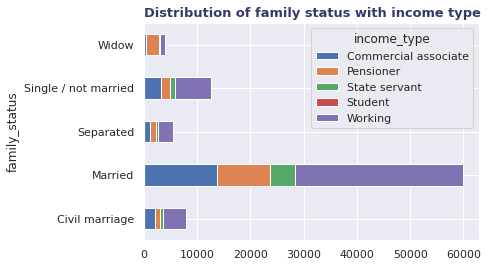

In [ ]:
sns.set(style="darkgrid")

family_status_income_agg = app.groupby(['family_status', 'income_type']).size().reset_index().pivot(columns='income_type', index='family_status', values=0)
family_status_income_agg.plot(kind='barh', stacked=True)
plt.title("Distribution of family status with income type", fontsize=13, color= '#343a67', fontweight='bold', loc='left')
plt.show()

Distribution of own a car with income type:
* About 60% are married and about 30% of them are working, about 15% of them are commercial associates, about 10% are pensioner and less than 10% are state servants.

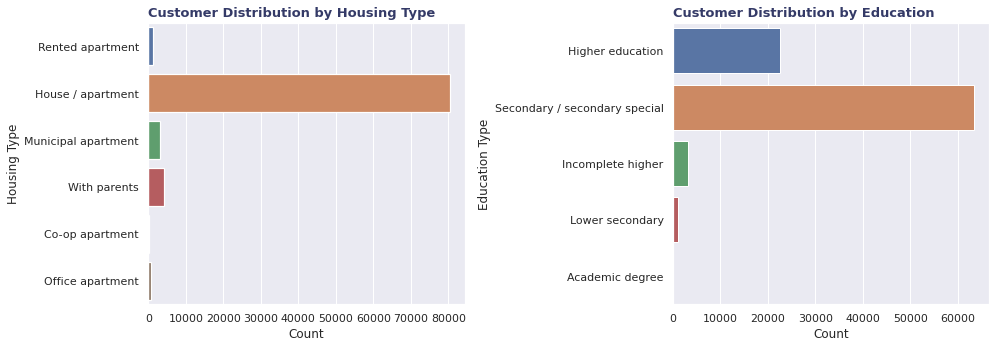

In [ ]:
sns.set(style="darkgrid")

fig, axes = plt.subplots(1,2)

g1= sns.countplot(y=app.housing_type,linewidth=1.2, ax=axes[0])
g1.set_title("Customer Distribution by Housing Type", fontsize=13, color= '#343a67', fontweight='bold', loc='left')
g1.set_xlabel("Count")
g1.set_ylabel("Housing Type")

g2= sns.countplot(y=app.education_type, ax=axes[1])
g2.set_title("Customer Distribution by Education", fontsize=13, color= '#343a67', fontweight='bold', loc='left')
g2.set_xlabel("Count")
g2.set_ylabel("Education Type")

fig.set_size_inches(14,5)

plt.tight_layout()

plt.show()

Customer Distribution by Housing Type:
* about 80% have a house, and less than 5% are living with parents.

Customer Distribution by Education Type:
* about 65% have secondary education, about 23% have higher education and less than 5% have incomplete higher education.



##### Check the distribution of some continuous variables

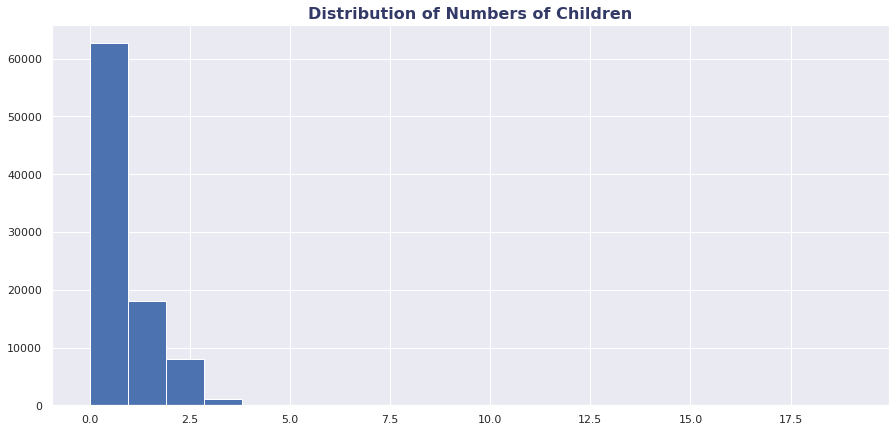

In [ ]:
sns.set(style="darkgrid")

# Distribution of Number of children
app['children_num'].hist(bins=20)
fig = plt.gcf()
fig.set_size_inches(15, 7)
plt.title("Distribution of Numbers of Children", fontsize=16, color= '#343a67', fontweight='bold')
plt.show()

= Note: the distribution is right skewed (there're outliers).

Distribution of Numbers of Children:
* about 65% don't have a child. about 18%
have one child, and about 8% have two children.

### Converting Categorical columns to numeric


The application dataset has 8 categorical features, for better usability of the information, I'll convert them to numeric data.

In [ ]:
# Get the categorical features from application table
categorical_cols = app.columns[app.dtypes == 'object'].tolist() 

# Print the unique values of categorical features
for col in app[categorical_cols].columns:
    print(col + ":")
    print(list(set(app[categorical_cols][col])), '\n')

gender:
['F', 'M'] 

own_car:
['Y', 'N'] 

own_realty:
['Y', 'N'] 

income_type:
['Commercial associate', 'Pensioner', 'Working', 'State servant', 'Student'] 

education_type:
['Incomplete higher', 'Secondary / secondary special', 'Lower secondary', 'Higher education', 'Academic degree'] 

family_status:
['Married', 'Single / not married', 'Separated', 'Civil marriage', 'Widow'] 

housing_type:
['Co-op apartment', 'Office apartment', 'House / apartment', 'Municipal apartment', 'With parents', 'Rented apartment'] 

occupation:
['HR staff', 'Laborers', 'Waiters/barmen staff', 'Cleaning staff', 'Managers', 'Others', 'Security staff', 'High skill tech staff', 'Medicine staff', 'Secretaries', 'Low-skill Laborers', 'Core staff', 'Private service staff', 'Realty agents', 'Accountants', 'Cooking staff', 'IT staff', 'Drivers', 'Sales staff'] 



In [ ]:
# Converting categorical data into numerical
app["gender"]  = app['gender'].replace(['F', 'M'], [0, 1])
app["own_car"] = app["own_car"].replace(['Y', 'N'], [1, 0])

app["own_realty"] = app["own_realty"].replace(['Y', 'N'], [1, 0])

app["is_working"] = app["income_type"].replace(['Commercial associate', 'Pensioner',
                                                'State servant', 'Working', 'Student'],
                                                [1, 0, 1, 1, 0])
app["is_married"] = app["family_status"].replace(['Civil marriage', 'Separated',
                                                 'Single / not married', 'Widow',
                                                  'Married'],
                                                  [1, 0, 0, 0, 1])


### Adjust values of some columns

In [ ]:
# Adjust the values of some columns and map it to our dataframe
income_type = {'Commercial associate': 'Working',
               'State servant': 'Working',
               'Working': 'Working',
               'Pensioner': 'Pensioner',
               'Student': 'Student'}
app["income_type"] = app["income_type"].map(income_type)


education_type = {'Secondary / secondary special': 'Secondary',
                  'Lower secondary': 'Secondary',
                  'Higher education': 'Higher education',
                  'Incomplete higher': 'Higher education',
                  'Academic degree': 'Academic degree'}
app["education_type"] = app["education_type"].map(education_type)


family_status = {'Single / not married': 'Single',
                     'Separated': 'Single',
                     'Widow': 'Single',
                     'Civil marriage': 'Married',
                    'Married': 'Married'}
app["family_status"] = app["family_status"].map(family_status)


housing_type = {'House / apartment' : 'House / Apartment',
                   'With parents': 'With parents',
                    'Municipal apartment' : 'House / Apartment',
                    'Rented apartment': 'House / Apartment',
                    'Office apartment': 'House / Apartment',
                    'Co-op apartment': 'House / Apartment'}
app["housing_type"] = app["housing_type"].map(housing_type)

## Feature Engineering

### Create new features

In [ ]:
# Get the month when users open their accounts
starting_month = pd.DataFrame(credit.groupby(["ID"])["MONTHS_BALANCE"].agg(min))
starting_month = starting_month.rename(columns={'MONTHS_BALANCE': 'Start_Month'}) 

customerDF = pd.merge(app, starting_month, how="left", on="ID") #merge to credit data

In [ ]:
# Get the household size
customerDF["household_size"] = customerDF["children_num"] + customerDF["is_married"].apply(lambda x: 2 if x==1 else 1)

#convert these birth days into positive numbers and years.
customerDF["age"] = customerDF.birth_days.apply(lambda x: round(x/-365,0))

#convert these employment days into positive numbers and years.
customerDF["experience"] = customerDF.emplyment_days.apply(lambda x: round(x/-365,0) if x<0 else 0)

customerDF=customerDF.drop(columns=['emplyment_days','birth_days','children_num'])


In [ ]:
# let's examine how many columns we will obtain after one hot encoding these vars
pd.get_dummies(customerDF, drop_first=True).shape

(90085, 39)

we can see that from just some initial categorical variables, we ended up with 39 new variables.

So, What can we do?

I only apply one hot encoding on the adjusted values of each categorical attribute, rather than all the values, in order to avoid an explosion in the number of features from variables with a huge vocabulary.

> Since the features I chose don't have unknown category, I can use `get_dummies` instead of `OneHotEncoder`.

In [ ]:
# Get the dummies of the previous adjusted features
customerDF = pd.get_dummies(customerDF, columns=['income_type', 'education_type', 
                                                 'family_status', 'housing_type'])

In [ ]:
# Display the first five rows of customerDF table
customerDF.head()

,ID,gender,own_car,own_realty,income,own_work_phone,own_phone,own_email,occupation,...,income_type_Student,income_type_Working,education_type_Academic degree,education_type_Higher education,education_type_Secondary,family_status_Married,family_status_Single,housing_type_House / Apartment,housing_type_With parents
0,5008804,1,1,1,"427,500.00",1,0,0,Others,...,0,1,0,1,0,1,0,1,0
1,5008806,1,1,1,"112,500.00",0,0,0,Security staff,...,0,1,0,0,1,1,0,1,0
2,5008808,0,0,1,"270,000.00",0,1,1,Sales staff,...,0,1,0,0,1,0,1,1,0
3,5008812,0,0,1,"283,500.00",0,0,0,Others,...,0,0,0,1,0,0,1,1,0
4,5008815,1,1,1,"270,000.00",1,1,1,Accountants,...,0,1,0,1,0,1,0,1,0


In [ ]:
# Display the shape of customerDF table
customerDF.shape

(90085, 26)

### Outliers Analysis

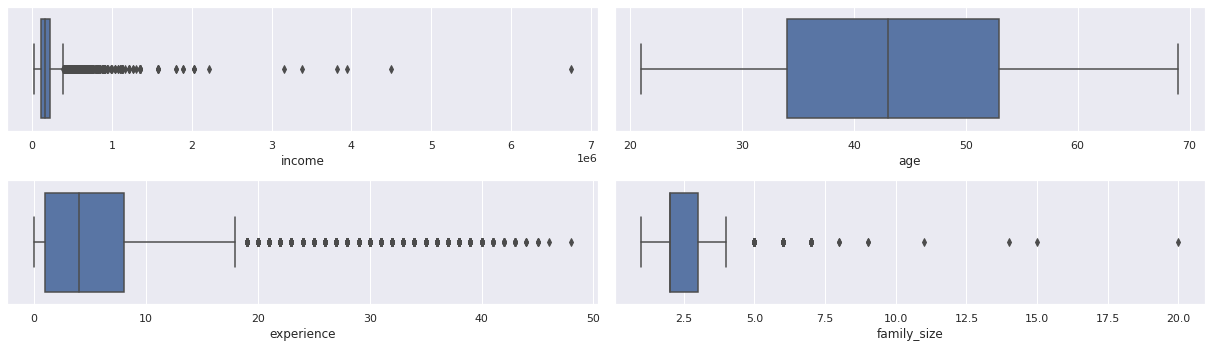

In [ ]:
# Function to plot box plot to check for outliers
def box_plot(data, numerical_cols, titles):
    plt.figure(figsize=(17, 5))
    for i in range(len(numerical_cols)):
        plt.subplot(2, 2, i + 1)
        sns.boxplot(x=data[numerical_cols[i]])
    plt.tight_layout()
    plt.show()

# Columns choosen for checking
numerical_cols = ["income", "age", "experience", "family_size"]
titles = ["Income", "Age", "Experience", "Family Member Count"]

# Plot box plot before removing outliers
box_plot(customerDF, numerical_cols, titles)

As shown above,

There are some outliers values in income, family size, and employment rate columns.

Also, as we remember from the children number skewed distribution, there're some outliers values in children count too.

I need to remove these outliers to make sure they do not affect our model results.
I will now remove these outliers by using z-scores.

In [ ]:
# Function to calculate z-scores to check for outliers
def calculate_z_scores(df, cols):
    for col in cols:
        df[col+"_z_score"] = (df[col] - df[col].mean())/df[col].std()
    return df

new_df = calculate_z_scores(df = customerDF, cols = ["income","experience","household_size"])


#removing outliers
filter_1 = new_df.household_size_z_score.abs() <= 3.5
filter_2 = new_df.experience_z_score.abs() <= 3.5
filter_3 = new_df.income_z_score.abs() <= 3.5

customer_apps = new_df[filter_1 & filter_2 & filter_3]
customer_apps.drop(columns= ["income_z_score","experience_z_score","household_size_z_score"],inplace=True)

In [ ]:
# Print shapes before and after removing outliers
print("Number of apps =", customerDF.shape)
print("Number of apps after removing outliers =", customer_apps.shape)

Number of apps = (90085, 29)
Number of apps after removing outliers = (87856, 26)


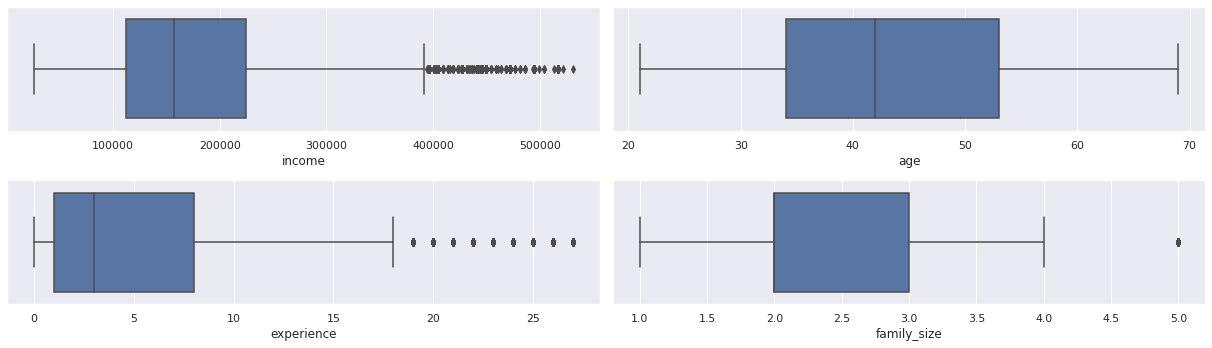

In [ ]:
# Plot box plot after removing outliers
box_plot(customer_apps, numerical_cols, titles)

### Create target column

In [ ]:
# Get the unique values of the STATUS column
status_uniques = credit['STATUS'].unique()
print('STATUS =', status_uniques)

STATUS = ['X' '0' 'C' '1' '2' '3' '4' '5']


In [ ]:
# Add new coulmn dep_value with all None on credit table
# Then, replace None values which has values on STATUS column in ('2', '3', '4' and '5')
# with 'Yes'
credit['dep_value'] = None
credit['dep_value'][credit['STATUS'] == '2'] = 'Yes' 
credit['dep_value'][credit['STATUS'] == '3'] = 'Yes' 
credit['dep_value'][credit['STATUS'] == '4'] = 'Yes' 
credit['dep_value'][credit['STATUS'] == '5'] = 'Yes' 

Now we need to determine how we should handle the loan repayment status of the customers. With this dataset, I defined dep_value = No” for those who didn’t have any loan or paid off that month while the remaining data, any overdue loan, was mapped to dep_value = Yes”.

In [ ]:
# Create Table called record_count with the data grouped from credit table by ID 

record_count = credit.groupby('ID').count()
record_count['dep_value'][record_count['dep_value']  > 0] = 'Yes' 
record_count['dep_value'][record_count['dep_value'] == 0] = 'No' 
record_count = record_count[['dep_value']]

record_count.head()

,dep_value
ID,
5001711,No
5001712,No
5001713,No
5001714,No
5001715,No


### Vintage Analysis to create target variable

the vintage analysis measures the performance of a portfolio in different periods of time after the loan (or credit card) was granted.

In [ ]:
# Create a pivot table with ID as index, MONTHS_BALANCE as cols and STATUS is the values
pivot_tb = credit.pivot(index='ID', columns='MONTHS_BALANCE', values='STATUS')

# Group credit data by ID 
grouped_ID = credit.groupby('ID')

# Add Open_Month, End_Month and Window columns in the pivot table
pivot_tb['Open_Month'] = grouped_ID['MONTHS_BALANCE'].min()
pivot_tb['End_Month']  = grouped_ID['MONTHS_BALANCE'].max()
pivot_tb['Window'] = pivot_tb['End_Month'] - pivot_tb['Open_Month'] + 1

# Shape of our pivot table
pivot_tb.shape

(45985, 64)

In [ ]:
# Counting number of paid offs
pivot_tb['paid_off'] = pivot_tb[pivot_tb.iloc[:, 0: 61] == 'C'].count(axis=1)

# Counting number of no loans
pivot_tb['no_loan'] = pivot_tb[pivot_tb.iloc[:, 0: 61] == 'X'].count(axis=1)

# Counting number past dues
pivot_tb['pastdue_1-29']  = pivot_tb[pivot_tb.iloc[:, 0: 61] == '0'].count(axis=1)
pivot_tb['pastdue_30-59'] = pivot_tb[pivot_tb.iloc[:, 0: 61] == '1'].count(axis=1)
pivot_tb['pastdue_60-89'] = pivot_tb[pivot_tb.iloc[:, 0: 61] == '2'].count(axis=1)
pivot_tb['pastdue_90-119']   = pivot_tb[pivot_tb.iloc[:, 0: 61] == '3'].count(axis=1)
pivot_tb['pastdue_120-149']  = pivot_tb[pivot_tb.iloc[:, 0: 61] == '4'].count(axis=1)
pivot_tb['pastdue_over_150'] = pivot_tb[pivot_tb.iloc[:, 0: 61] == '5'].count(axis=1)

In [ ]:
# Setting ID column again to merge with Application data
pivot_tb['ID'] = pivot_tb.index

In [ ]:
# Display the first five rows of the pivot table
pivot_tb.head()

MONTHS_BALANCE,-60,-59,-58,-57,-56,-55,-54,-53,-52,...,paid_off,no_loan,pastdue_1-29,pastdue_30-59,pastdue_60-89,pastdue_90-119,pastdue_120-149,pastdue_over_150,ID
ID,,,,,,,,,,,,,,,,,,,
5001711,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,1,3,0,0,0,0,0,5001711
5001712,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,9,0,10,0,0,0,0,0,5001712
5001713,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,22,0,0,0,0,0,0,5001713
5001714,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,15,0,0,0,0,0,0,5001714
5001715,NaN,X,X,X,X,X,X,X,X,...,0,60,0,0,0,0,0,0,5001715


In [ ]:
# Create an empty dataframe called target
target = pd.DataFrame()

# Add columns ID, paid_off, no_loan and #_of_pastdues which is the sum of all the pastdues
target['ID'] = pivot_tb.index
target['paid_off'] = pivot_tb['paid_off'].values
target['#_of_pastdues'] =   pivot_tb['pastdue_1-29'].values \
                          + pivot_tb['pastdue_30-59'].values \
                          + pivot_tb['pastdue_60-89'].values \
                          + pivot_tb['pastdue_90-119'].values \
                          + pivot_tb['pastdue_120-149'].values \
                          + pivot_tb['pastdue_over_150'].values                              
target['no_loan'] = pivot_tb['no_loan'].values

# Display the head of the target table
target.head()

,ID,paid_off,#_of_pastdues,no_loan
0,5001711,0,3,1
1,5001712,9,10,0
2,5001713,0,0,22
3,5001714,0,0,15
4,5001715,0,0,60


In [ ]:
# Merge customer_apps table with target table
customer_apps1 = customer_apps.merge(target, how='inner', on='ID')

# Merge customer_apps1 table with record_count table
customer_apps2 = pd.merge(customer_apps1, record_count, how='inner', on='ID')

# Create target column with values equal to dep_value values
customer_apps2['target'] = customer_apps2['dep_value']

# Replace the values of 'Yes' with 1 and 'No' with 0
customer_apps2.loc[customer_apps2['target'] == 'Yes', 'target'] = 1
customer_apps2.loc[customer_apps2['target'] == 'No',  'target'] = 0

# Drop dep_value column from the customer_apps2 table
customer_apps2.drop(columns=["dep_value"], inplace=True)

In [ ]:
# Drop unwanted feature
customer_apps2.drop('occupation', axis=1, inplace=True)

In [ ]:
# Display the head of the customer_apps2 table
customer_apps2.head()

,ID,gender,own_car,own_realty,income,own_work_phone,own_phone,own_email,family_size,...,education_type_Secondary,family_status_Married,family_status_Single,housing_type_House / Apartment,housing_type_With parents,paid_off,#_of_pastdues,no_loan,target
0,5008804,1,1,1,"427,500.00",1,0,0,2.00,...,0,1,0,1,0,13,2,1,0
1,5008806,1,1,1,"112,500.00",0,0,0,2.00,...,1,1,0,1,0,7,7,16,0
2,5008808,0,0,1,"270,000.00",0,1,1,1.00,...,1,0,1,1,0,0,2,3,0
3,5008812,0,0,1,"283,500.00",0,0,0,1.00,...,0,0,1,1,0,0,14,3,0
4,5008815,1,1,1,"270,000.00",1,1,1,2.00,...,0,1,0,1,0,0,6,0,0


## Prepare the data

In [ ]:
# Assign the features and target
y = customer_apps2['target']
X = customer_apps2[customer_apps2.drop('target', axis = 1).columns]

### Feature Scaling

**Scaling** or **Feature Scaling** is the process of changing the scale of certain features to a common one. This is typically achieved through normalization and standardization (scaling techniques).

In [ ]:
#StandardScaler
X_ss = pd.DataFrame(StandardScaler().fit_transform(X), columns=X.columns)

We scaled the data before splitting them into test and train because we want the model to receive values in the same range for both training and testing.

### Splitting the data

In [ ]:
# Split the dataset into 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(X_ss,y,
                                                   test_size=0.2,
                                                   random_state=42,
                                                   shuffle=True,
                                                   stratify=y)

In [ ]:
print(y_train.value_counts())
print(y_test.value_counts())

0    7397
1     165
Name: target, dtype: int64
0    1850
1      41
Name: target, dtype: int64


we recognize here that the target data is imbalanced, so we will need to scale the data.

### Oversampling data

We will over sample the training data only. By oversampling only on the training data, none of the information in the testing data is being used to create synthetic observations. So these results should be generalizable.

In [ ]:
# Balance the data using SMOTE
y_train = y_train.astype('int')
oversample = SMOTE(random_state=11)
X_balanced, y_balanced = oversample.fit_resample(X_train, y_train)
print(Counter(y_balanced))

SMOTE: Counter({0: 7397, 1: 7397})


Now the train data is balanced.

## Modeling

In [ ]:
classifiers = {
    "LogisticRegression" : LogisticRegression(),
    "KNeighbors" : KNeighborsClassifier(),
    "SVC" : SVC(),
    "DecisionTree" : DecisionTreeClassifier(),
    "RandomForest" : RandomForestClassifier()
}

In [ ]:
#Compute the training score of each models
y_test = y_test.astype('int')
train_scores = []
test_scores = []
for key, classifier in classifiers.items():
    classifier.fit(X_balanced, y_balanced)
    train_score = round(classifier.score(X_balanced, y_balanced),3)
    train_scores.append(train_score)
    test_score = round(classifier.score(X_test, y_test),3)
    test_scores.append(test_score)
print(train_scores)
print(test_scores)

[0.779, 0.968, 0.971, 1.0, 1.0]
[0.786, 0.893, 0.932, 0.953, 0.978]


* It seems that Logistic Regression doesn’t work well for the dataset as the scores are relatively low (around 75%).

* Decision Tree and Random Forest produced a significantly high accuracy scores on the train sets (100%) and test set accuracy (around 97.8% for the Random Forest).

In [ ]:
# Built the model
clf = XGBClassifier(max_depth=12,
                   n_estimators=250,
                   min_child_weight=8, 
                   subsample=0.8, 
                   learning_rate=0.02,    
                   seed=42)

# Fit your model
clf.fit(X_balanced, y_balanced)

# Prediction
y_predict = clf.predict(X_test)
     

In [ ]:
# Create table to store the Evaluations (Accuracy, Presicion, Recall, F1_score)
result_table = pd.DataFrame(columns=['Accuracy', 'Presicion', 'Recall', 'F1_score'])
result_table = result_table.append({'Clf': 'XGBoost',
                                    'Accuracy': accuracy_score(y_test, y_predict),
                                    'Presicion': precision_score(y_test, y_predict, average='weighted'),
                                    'Recall': recall_score(y_test, y_predict, average='weighted'),
                                    'F1_score': f1_score(y_test, y_predict, average='weighted')}, ignore_index=True)
result_table.set_index('Clf', inplace=True)

result_table.T

Clf,XGBoost
Accuracy,0.98
Presicion,0.97
Recall,0.98
F1_score,0.97
